In [33]:
import numpy as np
import pickle
import random

In [113]:
n_states = 2
n_actions = 20
gamma = 0.99

np.random.seed(0)
random.seed(0)

def softmax(v,axis):
    dim = v.shape[axis]
    max_v = np.max(v)
    v -= max_v
    exp_v = np.exp(v)
    denom = np.expand_dims(np.sum( exp_v, axis=axis), axis=axis)
    denom = denom.repeat(dim, axis=-1)
    return exp_v / denom

def logsumexp(v,axis):
    max_v = np.max(v)
    v -= max_v
    return np.log(np.sum( np.exp(v), axis=axis)) + max_v


In [114]:
class Environment:
    def __init__(self, n_states, n_actions, gamma):
        eps=0.01
        self.reward = np.zeros((n_states,n_actions))
        self.reward[0,:] = 1
        self.T = np.zeros((n_states,n_actions,n_states))
        self.T[0][0][0] = 1 - (1-gamma)/gamma + eps
        self.T[0][0][1] = (1-gamma)/gamma - eps
        for a in np.arange(1,n_actions):
            self.T[0][a][0] = 1 - (1-gamma)/gamma
            self.T[0][a][1] = (1-gamma)/gamma
        for a in np.arange(n_actions):
            self.T[1][a][1] = 1 - (1-gamma)/gamma
            self.T[1][a][0] = (1-gamma)/gamma
        
        
        
        #self.reward = np.random.randn(n_states,n_actions)
        #self. reward = - (self.reward - np.min(self.reward))/(np.max(self.reward) - np.min(self.reward))
        #next_states = np.random.choice(np.arange(n_states),size=n_states*n_actions, replace=True)
        #self.T = np.zeros((n_states,n_actions,n_states))
        #for s in range(n_states):
        #    for a in range(n_actions):
        #        self.T[s][a][next_states[s*n_actions + a]] = 1
        #self.T = softmax(np.random.randn(n_states,n_actions, n_states),axis=2)
        self.gamma = gamma

In [115]:
env = Environment(n_states, n_actions, gamma)

In [116]:
env.T

array([[[9.99898990e-01, 1.01010101e-04],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02],
        [9.89898990e-01, 1.01010101e-02]],

       [[1.01010101e-02, 9.89898990e-01],
        [1.01010101e-02, 9.89898990e-01],
        [1.01010101e-02, 9.89898990e-01],
        [1.01010101e-02, 9.89898

In [117]:
def soft_value_iteration(env):
    Q = np.zeros((n_states,n_actions))
    V = np.zeros(n_states)
    for _ in range(1000):
        Q = env.reward + env.gamma*env.T@V
        V_new = logsumexp(Q,-1)
        print(V_new.shape)
        tol = np.linalg.norm(V - V_new)
        print(tol)
        if  tol < 1e-1:
            break
        V = V_new
    return Q
def value_iteration(env):
    Q = np.zeros((n_states,n_actions))
    V = np.zeros(n_states)
    for _ in range(1000):
        Q = env.reward + env.gamma*env.T@V
        V_new = np.max(Q,-1)
        print(V_new.shape)
        tol = np.linalg.norm(V - V_new)
        print(tol)
        if  tol < 1e-1:
            break
        V = V_new
    return Q

In [118]:
Q = value_iteration(env)
expert = np.zeros((n_states,n_actions))
expert[:,np.argmax(Q,axis=1)] = 1

to_save = { "Q": Q, "policy":expert}

# Save to a pickle file
with open('expert.pkl', 'wb') as file:
    pickle.dump(to_save, file)

(2,)
1.0
(2,)
0.9899505088639532
(2,)
0.9801009945959954
(2,)
0.9704444792071498
(2,)
0.9609742174363158
(2,)
0.9516836917439785
(2,)
0.9425666072537926
(2,)
0.933616886652098
(2,)
0.9248286650553704
(2,)
0.9161962848553568
(2,)
0.9077142905515256
(2,)
0.8993774235800915
(2,)
0.8911806171486164
(2,)
0.8831189910848439
(2,)
0.8751878467080018
(2,)
0.8673826617304197
(2,)
0.8596990851969247
(2,)
0.8521329324689595
(2,)
0.8446801802599799
(2,)
0.8373369617281985
(2,)
0.8300995616322916
(2,)
0.8229644115552542
(2,)
0.8159280852010574
(2,)
0.8089872937684213
(2,)
0.8021388814054641
(2,)
0.7953798207486974
(2,)
0.7887072085492708
(2,)
0.7821182613890936
(2,)
0.7756103114890518
(2,)
0.7691808026110819
(2,)
0.7628272860557208
(2,)
0.7565474167561383
(2,)
0.7503389494696391
(2,)
0.7441997350671353
(2,)
0.7381277169208686
(2,)
0.7321209273904558
(2,)
0.7261774844070373
(2,)
0.720295588155107
(2,)
0.7144735178514314
(2,)
0.7087096286202512
(2,)
0.7030023484637392
(2,)
0.6973501753267641
(2,)
0.69

In [119]:
with open('expert.pkl', 'rb') as file:
    to_save = pickle.load(file)
Q = to_save["Q"]
expert = to_save["policy"]

In [120]:
evaluate_policy(expert,env)

array([92.24177233, 42.74407698])

In [121]:
from copy import deepcopy
def evaluate_policy(policy,env):
    V = np.zeros(n_states)
    V_new = np.zeros(n_states)
    for _ in range(1000):
        Q = env.reward+ env.gamma*env.T@V
        for x in range(n_states):
            V_new[x] = policy[x]@Q[x]
        tol = np.linalg.norm(V - V_new)
        if  tol < 1e-1:
            break
        V = deepcopy(V_new)
    return V

In [124]:
initial = np.array([1,0])

def sample_from_occupancy_measure(env, policy): #, torch_bool=False):
    state_id = np.random.choice(np.arange(n_states), p=initial)
    #if torch_bool:
    #    action_id = np.random.choice(np.arange(n_actions), 
    #                                 p=policy(torch.eye(n_states).to(torch.float32)[state_id].reshape(1,-1)).flatten().detach().numpy())
    #else:
    action_id = np.random.choice(np.arange(n_actions), p=policy[state_id])
    while True:
        stop = np.random.binomial(n=1, p=1 - env.gamma) 
        if stop:
            break
        state_id = np.random.choice(np.arange(n_states), p=env.T[state_id,action_id])
        action_id = np.random.choice(np.arange(n_actions), p=policy[state_id])
    
    return state_id
            
def sample_trajectory(env, policy): #, torch_bool=False):
    trajectory = {"states": [], "actions": []}
    state_id = np.random.choice(np.arange(n_states), p=initial)
    #if torch_bool:
    #    action_id = np.random.choice(np.arange(n_actions), 
    #                                 p=policy(torch.eye(n_states).to(torch.float32)[state_id].reshape(1,-1)).flatten().detach().numpy())
    #else:
    action_id = np.random.choice(np.arange(n_actions), p=policy[state_id])
    while True:
        trajectory["states"].append(state_id)
        trajectory["actions"].append(action_id)
        stop = np.random.binomial(n=1, p=1 - env.gamma) 
        if stop:
            break
        state_id = np.random.choice(np.arange(n_states), p=env.T[state_id,action_id])
        action_id = np.random.choice(np.arange(n_actions), p=policy[state_id])
    
    return trajectory       

def sample_dataset(n_expert_samples, env, policy):
    states = []
    actions = []
    for n in range(n_expert_samples):
        x = sample_from_occupancy_measure(env, policy)
        a = np.random.choice(np.arange(n_actions), p=policy[x])
    
        states.append(x)
        actions.append(a)
    return states, actions

In [164]:
expert_states, expert_actions = sample_dataset(100, env, expert)

In [170]:
def run_tabular_SOAR(env, expert_states, expert_actions, K=100, L=4, CMAX=1,alpha=0.9, method="min"):
    print("L equals :", L)
    values = []
    policy = np.ones((n_states,n_actions))/n_actions
    tuple_counter = np.zeros((L,n_states,n_actions))
    triplet_counter = np.zeros((L, n_states,n_actions,n_states))
    kernels = np.ones((L, n_states,n_actions,n_states))/n_states
    V = np.zeros(n_states) #np.ones(n_states)/(1-env.gamma)
    Q = np.zeros((n_states,n_actions)) #np.ones((n_states,n_actions))/(1-env.gamma)
    cost = 0.5*np.ones((n_states,n_actions))
    expert_estimate = np.zeros((n_states,n_actions))
    for x_E,a_E in zip(expert_states,expert_actions):
        expert_estimate[x_E,:] += 1
    expert_estimate /= len(expert_states)
    for k in range(K):
        learner_states, learner_actions = sample_dataset(len(expert_states),env, policy)
        learner_estimate = np.zeros((n_states,n_actions))
        for x_L,a_L in zip(learner_states, learner_actions):
            learner_estimate[x_L,:] += 1
        learner_estimate /= len(learner_states)  
        cost = cost - alpha*(expert_estimate - learner_estimate)
        cost = np.clip(cost, 0, CMAX)
        # print(cost, "cost")
        #print(cost)
        #if np.linalg.norm(cost) > CMAX:
        #    cost = cost /  np.linalg.norm(cost) * CMAX
        for l in range(L):
            for _ in range(1):
                traj = sample_trajectory(env, policy)
                for j in range(len(traj["states"]) - 1):
                    tuple_counter[l, traj["states"][j], traj["actions"][j]] += 1
                    triplet_counter[l, traj["states"][j], traj["actions"][j], traj["states"][j+1]] += 1
                    kernels[l,traj["states"][j], traj["actions"][j]] = \
                    triplet_counter[l,traj["states"][j], traj["actions"][j]]/tuple_counter[l,traj["states"][j], traj["actions"][j]]
            #kernels[l] = triplet_counter[l]/np.expand_dims(tuple_counter[l] + 2,axis=2).repeat(n_states,axis=-1)
        
        
        if method == "min":
            Q = cost + env.gamma*np.min(kernels@V,axis=0)
        if method == "UCB":
            Q = cost + env.gamma*kernels[0]@V - env.gamma*10/np.sqrt(tuple_counter[0]+1)
            Q = np.clip(Q, 0, CMAX/(1-env.gamma))
        elif method == "std":
            Q = cost + env.gamma*(np.mean(kernels@V,axis=0) - 0.001*np.std(kernels@V,axis=0))
            
            #print(np.std(kernels@V,axis=0), "std bonus")
            #print(1/np.sqrt(tuple_counter[0]+1), "UCB bonus")
            #print("--------------------------------------")
            #import pdb; pdb.set_trace()
            Q = np.clip(Q, 0, CMAX/(1-env.gamma))
        V_new = np.zeros(n_states)
        for x in range(n_states):
            V_new[x] = policy[x]@Q[x]
        V = deepcopy(V_new)    
        policy *= softmax(-4*Q,axis=1)
        
        policy /= np.expand_dims(policy.sum(axis=1),axis=1).repeat(n_actions,axis=-1)
        values.append(np.mean(evaluate_policy(policy,env)))
    print(kernels)
    return policy, values

In [173]:
seeds = 5
to_plot = {i: [] for i in range(seeds)}
policies = {i: [] for i in range(seeds)}
Ls = [1, 3, 5, 10]
for seed in range(seeds):
    np.random.seed(seed)
    random.seed(seed)
    for l in Ls:
        print(f"seed{seed}L{l}")
        policy, values = run_tabular_SOAR(env, expert_states, expert_actions, L=l,method="std")
        to_plot[seed].append(np.array(values))
        policies[seed].append(policy)
with open('to_plot_beta0001.pkl', 'wb') as file:
    pickle.dump(to_plot, file)
with open('policies_beta_0001.pkl', 'wb') as file:
    pickle.dump(policies, file)

seed0L1
L equals : 1
[[[[0.5        0.5       ]
   [0.98717949 0.01282051]
   [0.99105012 0.00894988]
   [0.97979798 0.02020202]
   [0.98148148 0.01851852]
   [0.99215686 0.00784314]
   [0.97058824 0.02941176]
   [0.95       0.05      ]
   [0.98989899 0.01010101]
   [0.96666667 0.03333333]
   [0.99224806 0.00775194]
   [0.98412698 0.01587302]
   [0.98906606 0.01093394]
   [0.95652174 0.04347826]
   [0.84615385 0.15384615]
   [0.99186992 0.00813008]
   [0.98275862 0.01724138]
   [0.98958333 0.01041667]
   [0.99227799 0.00772201]
   [0.99078813 0.00921187]]

  [[0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.01218804 0.98781196]
   [0

[[[[1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.83606557e-01 1.63934426e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.80099502e-01 1.99004975e-02]
   [9.82142857e-01 1.78571429e-02]
   [9.61538462e-01 3.84615385e-02]
   [9.86206897e-01 1.37931034e-02]
   [9.64285714e-01 3.57142857e-02]
   [9.94505495e-01 5.49450549e-03]
   [9.84251969e-01 1.57480315e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.31034483e-01 6.89655172e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.56521739e-01 4.34782609e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.75609756e-01 2.43902439e-02]]

  [[3.22580645e-02 9.67741935e-01]
   [3.70370370e-02 9.62962963e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [1.42857143e-02 9.85714286e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00

[[[[9.99692733e-01 3.07266861e-04]
   [9.91666667e-01 8.33333333e-03]
   [8.57142857e-01 1.42857143e-01]
   [9.72972973e-01 2.70270270e-02]
   [9.91404011e-01 8.59598854e-03]
   [9.78723404e-01 2.12765957e-02]
   [9.89583333e-01 1.04166667e-02]
   [5.00000000e-01 5.00000000e-01]
   [9.75609756e-01 2.43902439e-02]
   [9.69696970e-01 3.03030303e-02]
   [9.81132075e-01 1.88679245e-02]
   [8.88888889e-01 1.11111111e-01]
   [9.90825688e-01 9.17431193e-03]
   [9.93865031e-01 6.13496933e-03]
   [9.44444444e-01 5.55555556e-02]
   [9.82456140e-01 1.75438596e-02]
   [9.85294118e-01 1.47058824e-02]
   [9.90000000e-01 1.00000000e-02]
   [8.57142857e-01 1.42857143e-01]
   [9.94152047e-01 5.84795322e-03]]

  [[0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [6.99300699e-03 9.93006993e-01]
   [0.00000000e+00

[[[[9.99774011e-01 2.25988701e-04]
   [9.81132075e-01 1.88679245e-02]
   [9.74358974e-01 2.56410256e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.73684211e-01 2.63157895e-02]
   [9.83050847e-01 1.69491525e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.76190476e-01 2.38095238e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.87951807e-01 1.20481928e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.78723404e-01 2.12765957e-02]
   [9.67741935e-01 3.22580645e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.83606557e-01 1.63934426e-02]]

  [[4.76190476e-02 9.52380952e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [9.38967136e-03 9.90610329e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00

[[[[1.         0.        ]
   [0.99145299 0.00854701]
   [0.99449036 0.00550964]
   [0.98550725 0.01449275]
   [0.98989899 0.01010101]
   [0.94117647 0.05882353]
   [0.98850575 0.01149425]
   [0.99625468 0.00374532]
   [0.97560976 0.02439024]
   [0.98958333 0.01041667]
   [0.99337748 0.00662252]
   [0.96078431 0.03921569]
   [0.98765432 0.01234568]
   [0.97727273 0.02272727]
   [0.99696049 0.00303951]
   [0.98648649 0.01351351]
   [0.98666667 0.01333333]
   [0.99382716 0.00617284]
   [0.98275862 0.01724138]
   [0.99230769 0.00769231]]

  [[0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.00645161 0.99354839]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]
   [0.         1.        ]

[[[[9.99608048e-01 3.91951921e-04]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.81981982e-01 1.80180180e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.89247312e-01 1.07526882e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.72222222e-01 2.77777778e-02]
   [9.70588235e-01 2.94117647e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.94318182e-01 5.68181818e-03]
   [9.89130435e-01 1.08695652e-02]
   [9.85294118e-01 1.47058824e-02]
   [9.90196078e-01 9.80392157e-03]]

  [[0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [1.88679245e-02 9.81132075e-01]
   [0.00000000e+00 1.00000000e+00]
   [1.89873418e-02 9.81012658e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00

[[[[9.99850232e-01 1.49767860e-04]
   [9.90990991e-01 9.00900901e-03]
   [9.85074627e-01 1.49253731e-02]
   [9.84615385e-01 1.53846154e-02]
   [9.71014493e-01 2.89855072e-02]
   [9.89159892e-01 1.08401084e-02]
   [9.90000000e-01 1.00000000e-02]
   [9.87012987e-01 1.29870130e-02]
   [9.90566038e-01 9.43396226e-03]
   [9.79166667e-01 2.08333333e-02]
   [9.76190476e-01 2.38095238e-02]
   [9.90909091e-01 9.09090909e-03]
   [9.88888889e-01 1.11111111e-02]
   [9.96101365e-01 3.89863548e-03]
   [9.94535519e-01 5.46448087e-03]
   [9.82456140e-01 1.75438596e-02]
   [9.74358974e-01 2.56410256e-02]
   [9.88505747e-01 1.14942529e-02]
   [9.80392157e-01 1.96078431e-02]
   [9.79591837e-01 2.04081633e-02]]

  [[0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [9.47867299e-03 9.90521327e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00

[[[[1.00000000e+00 0.00000000e+00]
   [9.09090909e-01 9.09090909e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.69696970e-01 3.03030303e-02]
   [9.33333333e-01 6.66666667e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.86486486e-01 1.35135135e-02]
   [9.87804878e-01 1.21951220e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.83333333e-01 1.66666667e-02]
   [9.04761905e-01 9.52380952e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]]

  [[4.08163265e-02 9.59183673e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [1.56250000e-02 9.84375000e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00

[[[[9.99850924e-01 1.49075730e-04]
   [9.89010989e-01 1.09890110e-02]
   [9.96428571e-01 3.57142857e-03]
   [9.90783410e-01 9.21658986e-03]
   [9.65517241e-01 3.44827586e-02]
   [9.90595611e-01 9.40438871e-03]
   [9.93506494e-01 6.49350649e-03]
   [9.97315436e-01 2.68456376e-03]
   [9.87951807e-01 1.20481928e-02]
   [9.87179487e-01 1.28205128e-02]
   [9.44444444e-01 5.55555556e-02]
   [9.88888889e-01 1.11111111e-02]
   [9.89361702e-01 1.06382979e-02]
   [7.00000000e-01 3.00000000e-01]
   [9.61538462e-01 3.84615385e-02]
   [8.00000000e-01 2.00000000e-01]
   [9.60000000e-01 4.00000000e-02]
   [9.50000000e-01 5.00000000e-02]
   [9.74358974e-01 2.56410256e-02]
   [9.95815900e-01 4.18410042e-03]]

  [[1.81818182e-02 9.81818182e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [1.03092784e-02

[[[[9.99716393e-01 2.83607487e-04]
   [9.81481481e-01 1.85185185e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.79166667e-01 2.08333333e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.90990991e-01 9.00900901e-03]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.80392157e-01 1.96078431e-02]
   [8.75000000e-01 1.25000000e-01]
   [9.89010989e-01 1.09890110e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.76190476e-01 2.38095238e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.83050847e-01 1.69491525e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00

In [187]:
seeds = 5
to_plot = {i: [] for i in range(seeds)}
policies = {i: [] for i in range(seeds)}
Ls = [2]
for seed in range(seeds):
    np.random.seed(seed)
    random.seed(seed)
    for l in Ls:
        print(f"seed{seed}L{l}")
        policy, values = run_tabular_SOAR(env, expert_states, expert_actions, L=l,method="std")
        to_plot[seed].append(np.array(values))
        policies[seed].append(policy)
with open('to_plot_2_beta0001.pkl', 'wb') as file:
    pickle.dump(to_plot, file)
with open('policies_2_beta0001.pkl', 'wb') as file:
    pickle.dump(policies, file)

seed0L2
L equals : 2
[[[[9.99869247e-01 1.30753138e-04]
   [9.95283019e-01 4.71698113e-03]
   [9.56521739e-01 4.34782609e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.89010989e-01 1.09890110e-02]
   [9.72222222e-01 2.77777778e-02]
   [9.95000000e-01 5.00000000e-03]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.75609756e-01 2.43902439e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.37500000e-01 6.25000000e-02]
   [9.37500000e-01 6.25000000e-02]
   [9.95316159e-01 4.68384075e-03]
   [9.86928105e-01 1.30718954e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [3.44827586e-02 9.65517241e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+0

[[[[9.99876115e-01 1.23885035e-04]
   [9.47368421e-01 5.26315789e-02]
   [9.58333333e-01 4.16666667e-02]
   [9.50000000e-01 5.00000000e-02]
   [9.77272727e-01 2.27272727e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.63636364e-01 3.63636364e-02]
   [9.75609756e-01 2.43902439e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.60000000e-01 4.00000000e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.16666667e-01 8.33333333e-02]
   [9.75000000e-01 2.50000000e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.58333333e-01 4.16666667e-02]
   [9.95049505e-01 4.95049505e-03]
   [9.62962963e-01 3.70370370e-02]
   [1.00000000e+00 0.00000000e+00]
   [9.94623656e-01 5.37634409e-03]]

  [[6.21118012e-03 9.93788820e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [1.36986301e-02 9.86301370e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00

In [174]:
seeds = 5
to_plot = {i: [] for i in range(seeds)}
policies = {i: [] for i in range(seeds)}
Ls = [50,100]
for seed in range(seeds):
    np.random.seed(seed)
    random.seed(seed)
    for l in Ls:
        print(f"seed{seed}L{l}")
        policy, values = run_tabular_SOAR(env, expert_states, expert_actions, L=l,method="std")
        to_plot[seed].append(np.array(values))
        policies[seed].append(policy)
with open('to_plot_50_100_beta0001.pkl', 'wb') as file:
    pickle.dump(to_plot, file)
with open('policies_50_100_beta0001.pkl', 'wb') as file:
    pickle.dump(policies, file)

seed0L50
L equals : 50
[[[[1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 1.00000000e+00]
   [2.00000000e-01 8.00000000e-01]
   [1.25000000e-01 8.75000000e-01]
   ...
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]]]


 [[[9.99766927e-01 2.33073068e-04]
   [9.84126984e-01 1.58730159e-02]
   [9.87341772e-01 1.26582278e-02]
   ...
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [9.91379310e-01 8.62068966e-03]]

  [[5.26315789e-02 9.47368421e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   ...
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]]]


 [[[9.99888505e-01 1.11495150e-04]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.000000

[[[[1.00000000e+00 0.00000000e+00]
   [9.84848485e-01 1.51515152e-02]
   [1.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [4.54545455e-02 9.54545455e-01]
   ...
   [4.76190476e-02 9.52380952e-01]
   [7.14285714e-02 9.28571429e-01]
   [9.09090909e-02 9.09090909e-01]]]


 [[[1.00000000e+00 0.00000000e+00]
   [9.84615385e-01 1.53846154e-02]
   [1.00000000e+00 0.00000000e+00]
   ...
   [9.59459459e-01 4.05405405e-02]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]]

  [[1.53846154e-02 9.84615385e-01]
   [1.49253731e-02 9.85074627e-01]
   [2.04081633e-02 9.79591837e-01]
   ...
   [0.00000000e+00 1.00000000e+00]
   [3.22580645e-02 9.67741935e-01]
   [0.00000000e+00 1.00000000e+00]]]


 [[[9.99893955e-01 1.06044539e-04]
   [9.47368421e-01 5.26315789e-02]
   [9.87012987e-01 1.29870130e-02]
   ...
   [1.00

[[[[1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00]
   [9.73333333e-01 2.66666667e-02]
   [1.00000000e+00 0.00000000e+00]]

  [[4.00000000e-02 9.60000000e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   ...
   [4.54545455e-02 9.54545455e-01]
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]]]


 [[[1.00000000e+00 0.00000000e+00]
   [9.88235294e-01 1.17647059e-02]
   [1.00000000e+00 0.00000000e+00]
   ...
   [9.52380952e-01 4.76190476e-02]
   [9.89361702e-01 1.06382979e-02]
   [1.00000000e+00 0.00000000e+00]]

  [[2.32558140e-02 9.76744186e-01]
   [0.00000000e+00 1.00000000e+00]
   [4.87804878e-02 9.51219512e-01]
   ...
   [0.00000000e+00 1.00000000e+00]
   [0.00000000e+00 1.00000000e+00]
   [5.00000000e-02 9.50000000e-01]]]


 [[[9.99877466e-01 1.22534003e-04]
   [1.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00]
   ...
   [1.00

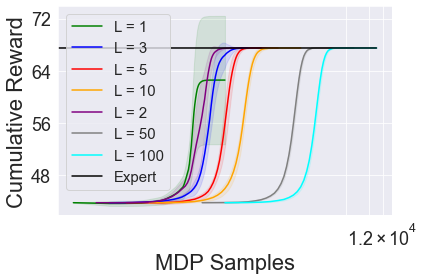

In [191]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style("darkgrid")
def plot(file_out): 
    Ls = [1,3,5,10,2,50,100]
    with open(f'to_plot_beta0001.pkl', 'rb') as file:
        to_plot_1 = pickle.load(file)
    with open(f'to_plot_50_100_beta0001.pkl', 'rb') as file:
        to_plot_50_100 = pickle.load(file)
    with open(f'to_plot_2_beta0001.pkl', 'rb') as file:
        to_plot_2 = pickle.load(file)
    averages = { l : [] for l in Ls}
    stds = { l : [] for l in Ls}
    for id_, l  in enumerate(Ls):
        if l in [1,3,5,10]:
            values = []
            for seed in range(seeds):
                values.append(to_plot_1[seed][id_])
            averages[l] = np.mean(values,axis=0)
            stds[l] = np.std(values,axis=0)
        elif l == 2:
            values = []
            for seed in range(seeds):
                values.append(to_plot_2[seed][0])
            averages[l] = np.mean(values,axis=0)
            stds[l] = np.std(values,axis=0)
        else:
            values = []
            for seed in range(seeds):
                values.append(to_plot_50_100[seed][id_-5])
            averages[l] = np.mean(values,axis=0)
            stds[l] = np.std(values,axis=0)
            
    
    expert_value = np.mean(np.array(evaluate_policy(expert,env)))
    
    fig, ax = plt.subplots()
    colors = ["green","blue","red", "orange","purple", "gray", "cyan"]
    for id_, l  in enumerate(Ls):
        line = averages[l] #np.cumsum(averages[l])/np.arange(1,len(averages[l])+1) 
        xs = l*np.arange(1,len(averages[l])+1) 
        ax.semilogx(xs,line, label=f"L = {l}", color=colors[id_])
        ax.fill_between(xs, #np.arange(line.shape[0]), 
                        line - stds[l], line + stds[l], color=colors[id_], alpha=0.1)
    ax.plot(expert_value*np.ones(l*len(averages[l])), color="black", label="Expert")
    plt.legend(fontsize=15)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    plt.ylabel("Cumulative Reward", fontsize=22)
    plt.xlabel("MDP Samples", fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.savefig(file_out)
    plt.show()
    
plot("fig.pdf")

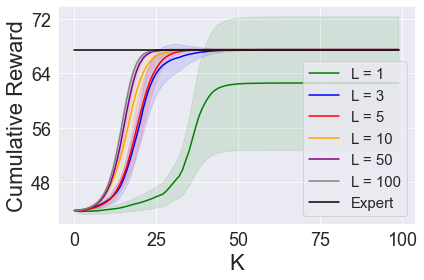

In [185]:
def plot_iterations(file_out): 
    Ls = [1,3,5,10,50,100]
    with open(f'to_plot_beta0001.pkl', 'rb') as file:
        to_plot_1 = pickle.load(file)
    with open(f'to_plot_50_100_beta0001.pkl', 'rb') as file:
        to_plot_50_100 = pickle.load(file)
    averages = { l : [] for l in Ls}
    stds = { l : [] for l in Ls}
    for id_, l  in enumerate(Ls):
        if l in [1,3,5,10]:
            values = []
            for seed in range(seeds):
                values.append(to_plot_1[seed][id_])
            averages[l] = np.mean(values,axis=0)
            stds[l] = np.std(values,axis=0)
        else:
            values = []
            for seed in range(seeds):
                values.append(to_plot_50_100[seed][id_-4])
            averages[l] = np.mean(values,axis=0)
            stds[l] = np.std(values,axis=0)
            
    
    expert_value = np.mean(np.array(evaluate_policy(expert,env)))
    
    fig, ax = plt.subplots()
    colors = ["green","blue","red", "orange","purple", "gray"]
    for id_, l  in enumerate(Ls):
        line = averages[l] #np.cumsum(averages[l])/np.arange(1,len(averages[l])+1) 
        xs = l*np.arange(1,len(averages[l])+1) 
        ax.plot(line, label=f"L = {l}", color=colors[id_])
        ax.fill_between(np.arange(line.shape[0]), 
                        line - stds[l], line + stds[l], color=colors[id_], alpha=0.1)
    ax.plot(expert_value*np.ones_like(averages[l]), color="black", label="Expert")
    plt.legend(fontsize=15)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    plt.ylabel("Cumulative Reward", fontsize=22)
    plt.xlabel("K", fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.savefig(file_out)
    plt.show()
    
plot_iterations("fig.pdf")

In [50]:
np.mean(np.array(evaluate_policy(expert,env)))

2.1913970205175524

In [17]:
def plot_zoom(file_out): 
    with open(f'to_plot.pkl', 'rb') as file:
            to_plot = pickle.load(file)
    averages = { l : [] for l in [1,3,5,10,100]}
    stds = { l : [] for l in [1,3,5,10,100]}
    for id_, l  in enumerate([1,3,5,10,100]):
        values = []
        print(to_plot.keys())
        for seed in range(seeds):
            values.append(to_plot[seed][id_])
        averages[l] = np.mean(values,axis=0)
        stds[l] = np.std(values,axis=0)
    
    expert_value = np.mean(-1*np.array(evaluate_policy(expert,env)))
    
    fig, ax = plt.subplots()
    colors = ["green","blue","red", "orange","purple"]
    for id_, l  in enumerate([1,3,5,10,100]):
        ax.plot(averages[l], label=f"L = {l}", color=colors[id_])
        ax.fill_between(np.arange(averages[l].shape[0]), 
                       averages[l] - stds[l], averages[l] + stds[l], color=colors[id_], alpha=0.1)
    ax.plot(expert_value*np.ones_like(averages[l]), color="black", label="Expert")
    plt.legend(fontsize=15)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    plt.ylabel("Cumulative Cost", fontsize=22)
    plt.xlabel("Epochs", fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.savefig(file_out)
    plt.xlim([0,100])
    plt.ylim([-1.7,-1.4])
    plt.show()
plot_zoom("fig_zoom.pdf")

dict_keys([0, 1])
dict_keys([0, 1])


IndexError: list index out of range

In [89]:
expert_estimate = np.zeros((n_states,n_actions))
for x_E,a_E in zip(expert_states,expert_actions):
    expert_estimate[x_E,:] += 1
    print(expert_estimate)
expert_estimate /= len(expert_states)

[[1. 1.]
 [0. 0.]]
[[2. 2.]
 [0. 0.]]
[[3. 3.]
 [0. 0.]]
[[4. 4.]
 [0. 0.]]
[[5. 5.]
 [0. 0.]]
[[6. 6.]
 [0. 0.]]
[[7. 7.]
 [0. 0.]]
[[8. 8.]
 [0. 0.]]
[[9. 9.]
 [0. 0.]]
[[10. 10.]
 [ 0.  0.]]
[[11. 11.]
 [ 0.  0.]]
[[12. 12.]
 [ 0.  0.]]
[[13. 13.]
 [ 0.  0.]]
[[14. 14.]
 [ 0.  0.]]
[[15. 15.]
 [ 0.  0.]]
[[16. 16.]
 [ 0.  0.]]
[[17. 17.]
 [ 0.  0.]]
[[18. 18.]
 [ 0.  0.]]
[[19. 19.]
 [ 0.  0.]]
[[20. 20.]
 [ 0.  0.]]
[[21. 21.]
 [ 0.  0.]]
[[22. 22.]
 [ 0.  0.]]
[[23. 23.]
 [ 0.  0.]]
[[24. 24.]
 [ 0.  0.]]
[[25. 25.]
 [ 0.  0.]]
[[26. 26.]
 [ 0.  0.]]
[[27. 27.]
 [ 0.  0.]]
[[28. 28.]
 [ 0.  0.]]
[[29. 29.]
 [ 0.  0.]]
[[30. 30.]
 [ 0.  0.]]
[[31. 31.]
 [ 0.  0.]]
[[32. 32.]
 [ 0.  0.]]
[[33. 33.]
 [ 0.  0.]]
[[34. 34.]
 [ 0.  0.]]
[[35. 35.]
 [ 0.  0.]]
[[36. 36.]
 [ 0.  0.]]
[[37. 37.]
 [ 0.  0.]]
[[38. 38.]
 [ 0.  0.]]
[[39. 39.]
 [ 0.  0.]]
[[40. 40.]
 [ 0.  0.]]
[[41. 41.]
 [ 0.  0.]]
[[42. 42.]
 [ 0.  0.]]
[[43. 43.]
 [ 0.  0.]]
[[44. 44.]
 [ 0.  0.]]
[[45. 45.]
 [ 0.  0.]]
[

In [90]:
expert_estimate

array([[1., 1.],
       [0., 0.]])